<a href="https://colab.research.google.com/github/nhamhung/CS3244-Machine-Learning/blob/main/CS3244_DL_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import json 
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

X_train = pd.read_csv('/content/drive/My Drive/CS3244 Project/Wiki Toxic Classification/train.csv')
X_test = pd.read_csv('/content/drive/My Drive/CS3244 Project/Wiki Toxic Classification/test.csv')
df_test_labels = pd.read_csv('/content/drive/My Drive/CS3244 Project/Wiki Toxic Classification/test_labels.csv')

# Deep Learning

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
import sys, os, re, csv, codecs, numpy as np, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, GRU,Conv1D,MaxPooling1D
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
# preprocess
def preprocess(max_features=20000, maxlen=200):
  labels = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
  
  y = X_train[labels].values
  train_sentence_list = X_train['comment_text']
  test_sentence_list = X_test['comment_text']

  tokenizer = Tokenizer(num_words=max_features)
  tokenizer.fit_on_texts(list(train_sentence_list))
  train_tokenized_list = tokenizer.texts_to_sequences(train_sentence_list)
  test_tokenized_list = tokenizer.texts_to_sequences(test_sentence_list)

  X_t = pad_sequences(train_tokenized_list, maxlen=maxlen)
  X_te = pad_sequences(test_tokenized_list, maxlen=maxlen)

  return tokenizer, X_t, X_te, train_tokenized_list, test_tokenized_list, y

In [ ]:
tokenizer, X_t, X_te, train_tokenized_list, test_tokenized_list, y = preprocess()

In [ ]:
tokenizer.word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'and': 4,
 'a': 5,
 'you': 6,
 'i': 7,
 'is': 8,
 'that': 9,
 'in': 10,
 'it': 11,
 'for': 12,
 'this': 13,
 'not': 14,
 'on': 15,
 'be': 16,
 'as': 17,
 'have': 18,
 'are': 19,
 'your': 20,
 'with': 21,
 'if': 22,
 'article': 23,
 'was': 24,
 'or': 25,
 'but': 26,
 'page': 27,
 'wikipedia': 28,
 'my': 29,
 'an': 30,
 'from': 31,
 'by': 32,
 'do': 33,
 'at': 34,
 'me': 35,
 'about': 36,
 'so': 37,
 'talk': 38,
 'what': 39,
 'can': 40,
 'there': 41,
 'all': 42,
 'has': 43,
 'will': 44,
 'please': 45,
 'no': 46,
 'would': 47,
 'one': 48,
 'like': 49,
 'just': 50,
 'they': 51,
 'he': 52,
 'which': 53,
 'any': 54,
 'been': 55,
 'should': 56,
 'more': 57,
 'we': 58,
 "don't": 59,
 'some': 60,
 'other': 61,
 'who': 62,
 'here': 63,
 'see': 64,
 'also': 65,
 'his': 66,
 'think': 67,
 'because': 68,
 'know': 69,
 'how': 70,
 'edit': 71,
 'am': 72,
 "i'm": 73,
 'people': 74,
 'why': 75,
 'up': 76,
 'only': 77,
 "it's": 78,
 'out': 79,
 'articles': 80,
 'use': 81,

In [ ]:
X_t[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [ ]:
totalNumWords = [len(one_comment) for one_comment in train_tokenized_list]

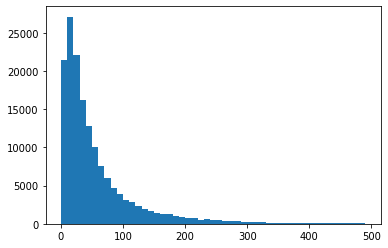

In [ ]:
plt.hist(totalNumWords,bins = np.arange(0,500,10))
plt.show()

In [ ]:
def build_LSTM(maxlen, embed_size, max_features):
  inp = Input(shape=(maxlen, )) #maxlen=200 as defined earlier
  x = Embedding(max_features, embed_size)(inp)
  x = LSTM(60, return_sequences=True,name='lstm_layer', dropout=0.2,recurrent_dropout=0.2)(x)
  x = GlobalMaxPool1D()(x)
  x = Dropout(0.2 )(x)
  x = Dense(50, activation="relu")(x)
  x = Dropout(0.2)(x)
  x = Dense(6, activation="sigmoid")(x)
  model = Model(inputs=inp, outputs=x)
  model.compile(loss='binary_crossentropy',
                    optimizer='adam',
                  metrics=['accuracy', tf.keras.metrics.AUC()])
  return model

In [ ]:
model = build_LSTM(200, 300, 20000)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 200, 300)          6000000   
_________________________________________________________________
lstm_layer (LSTM)            (None, 200, 60)           86640     
_________________________________________________________________
global_max_pooling1d (Global (None, 60)                0         
_________________________________________________________________
dropout (Dropout)            (None, 60)                0         
_________________________________________________________________
dense (Dense)                (None, 50)                3050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)               

In [ ]:
batch_size = 32
epochs = 4

checkpoint_filepath = '/content/drive/My Drive/CS3244 Project/checkpoints/LSTM.ckpt'

callbacks_list = [EarlyStopping(monitor='val_loss', patience=3), ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=True, monitor='val_loss', mode='min', save_best_only=True)]

model.fit(X_t,y, batch_size=batch_size, epochs=epochs, validation_split=0.1, callbacks=callbacks_list)


Epoch 1/4
4488/4488 [==============================] - 2341s 522ms/step - loss: 0.0698 - accuracy: 0.9339 - auc: 0.9568 - val_loss: 0.0489 - val_accuracy: 0.9918 - val_auc: 0.9797
Epoch 2/4
4488/4488 [==============================] - 2326s 518ms/step - loss: 0.0452 - accuracy: 0.9878 - auc: 0.9836 - val_loss: 0.0468 - val_accuracy: 0.9935 - val_auc: 0.9795
Epoch 3/4
4488/4488 [==============================] - 2331s 519ms/step - loss: 0.0397 - accuracy: 0.9728 - auc: 0.9881 - val_loss: 0.0476 - val_accuracy: 0.9913 - val_auc: 0.9780
Epoch 4/4
4488/4488 [==============================] - 2343s 522ms/step - loss: 0.0353 - accuracy: 0.9664 - auc: 0.9905 - val_loss: 0.0500 - val_accuracy: 0.9934 - val_auc: 0.9723


In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 200, 300)          6000000   
_________________________________________________________________
lstm_layer (LSTM)            (None, 200, 60)           86640     
_________________________________________________________________
global_max_pooling1d (Global (None, 60)                0         
_________________________________________________________________
dropout (Dropout)            (None, 60)                0         
_________________________________________________________________
dense (Dense)                (None, 50)                3050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)               

In [ ]:
test = X_t[:100]
predictions = model.predict(test)

In [ ]:
X_train[:20]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [ ]:
predictions[6]

array([0.9991212 , 0.14068237, 0.984817  , 0.00149697, 0.79411495,
       0.00560114], dtype=float32)

In [ ]:
model.save('baseline_LSTM_Tokenization.h5')

In [ ]:
y_test = model.predict([X_te], batch_size=1024, verbose=1)


In [ ]:
y_test
sample_submission = pd.read_csv('/content/drive/My Drive/CS3244 Project/Wiki Toxic Classification/sample_submission.csv')
sample_submission[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]] = y_test
sample_submission.to_csv('LSTM_ready_for_submission.csv', index=False)
sample_submission = pd.merge(sample_submission, X_test, how='inner', on='id')

In [ ]:
sample_submission.head(20)